# utils

> Some utilities for minion for visualizations, context managers etc...

In [66]:
#| default_exp utils

In [67]:
#| hide
from nbdev.showdoc import *

In [68]:
#| export
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
# import graphviz
from graphviz import Digraph
from minion.core import Value


In [69]:
%matplotlib inline

In [70]:
g = Digraph("Computational Graph of Value", comment="Comp Graph"); g
a = g.node("A")
b = g.node("B")
# g.node?

In [71]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

d = a*b; d.label = "d"
e = d+c; e.label = "e"
e

Value(e|data=4.0)

In [72]:
for i in e._prev:
    print(i, i._op)

Value(d|data=-6.0) *
Value(c|data=10.0) None


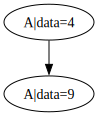

In [73]:
g = Digraph("Computational Graph of Value", comment="Comp Graph"); g
g.node(str(1), "A|data=4")
g.node(str(2), "A|data=9")
g.edges(["12"])
g

In [74]:
# Below doesn't work

# def build_graph(root, g = None):
#     if not g: g = graphviz.Digraph("Computational Graph of Value", comment="Comp Graph"); g
#     g.node("a", f"{root.label}|{root.data}")
#     if root._prev:
#         t = ""
#         for i, val in enumerate(root._prev):
#             g.node(str(i),f"{val.label}|{val.data}" )
#             g.edges([str(i)+"a"])
#             build_graph(val,)
#     return g

# build_graph(e)

In order for us to build a visualization of computational graph of `Value` object. We need to first create a set of all nodes and connections/ edges between them. We can then use graphviz to visualize the graph in one shot. This would be the simplest algorithm for now

In [75]:
#| export
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v: nodes.add(v)
        for i in v._prev:
            nodes.add(i)
            edges.add((i, v))
            build(i)
    build(root)
    return nodes, edges

It's interesting to choose a glocal sets for nodes and edges, calling them implicity within trace inside recursion. It does make for one simpler and efficient algorithm

In [76]:
trace(e)

({Value(a|data=2.0),
  Value(b|data=-3.0),
  Value(c|data=10.0),
  Value(d|data=-6.0),
  Value(e|data=4.0)},
 {(Value(a|data=2.0), Value(d|data=-6.0)),
  (Value(b|data=-3.0), Value(d|data=-6.0)),
  (Value(c|data=10.0), Value(e|data=4.0)),
  (Value(d|data=-6.0), Value(e|data=4.0))})

In [77]:
#| export
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir":'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        # print(str(id(n)))
        uid = str(id(n))
        dot.node(uid, label=f" {{ {n.label}|{n.data:.4f}  }}", shape='record') # For { in f-string use {{
        if n._op:
            dot.node(uid+n._op, n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
        
    return dot

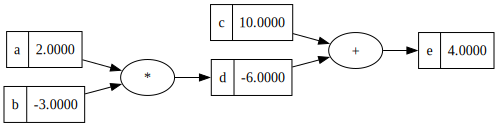

In [78]:

draw_dot(e)

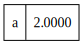

In [79]:
draw_dot(a)

In [80]:
#| hide
import nbdev; nbdev.nbdev_export()